In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student.csv',index_col = 'Unnamed: 0')
data

,name,age
0,a,36
1,b,22
2,c,26
3,d,24
4,e,25
5,f,26
6,g,50
7,h,55
8,i,60


In [3]:
data.values

array([['a', 36],
       ['b', 22],
       ['c', 26],
       ['d', 24],
       ['e', 25],
       ['f', 26],
       ['g', 50],
       ['h', 55],
       ['i', 60]], dtype=object)

In [4]:
# saving in numpy
np.savez(
 'data.npz', data = data.values,columns = np.array(data.columns)
)

In [5]:
with np.load('data.npz',allow_pickle = True) as file:
    print(file['data'])
    print(file['columns'])

[['a' 36]
 ['b' 22]
 ['c' 26]
 ['d' 24]
 ['e' 25]
 ['f' 26]
 ['g' 50]
 ['h' 55]
 ['i' 60]]
['name' 'age']


## Statistics

In [6]:
data

,name,age
0,a,36
1,b,22
2,c,26
3,d,24
4,e,25
5,f,26
6,g,50
7,h,55
8,i,60


In [7]:
data.describe()

,age
count,9.000000
mean,36.000000
std,14.974979
min,22.000000
25%,25.000000
50%,26.000000
75%,50.000000
max,60.000000


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9.0,36.0,14.974979,22.0,25.0,26.0,50.0,60.0


In [9]:
data['age'].value_counts()

26    2
50    1
36    1
22    1
55    1
24    1
25    1
60    1
Name: age, dtype: int64

In [10]:
source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal length','sepal width','petal length','petal width','spacies']
df = pd.read_csv(source,names = columns)
df

,sepal length,sepal width,petal length,petal width,spacies
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [13]:
df['spacies'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: spacies, dtype: int64

In [14]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [15]:
df.corr()[['petal length']]

,petal length
sepal length,0.871754
sepal width,-0.420516
petal length,1.000000
petal width,0.962757


In [16]:
df.corr()[['petal length']].loc['sepal length']

petal length    0.871754
Name: sepal length, dtype: float64

In [17]:
df.corrwith(df['sepal length'], axis = 0)

sepal length    1.000000
sepal width    -0.109369
petal length    0.871754
petal width     0.817954
dtype: float64

## GroupBy

In [18]:
df.groupby(by='spacies').mean()

,sepal length,sepal width,petal length,petal width
spacies,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [19]:
df.groupby(by='spacies').std()

,sepal length,sepal width,petal length,petal width
spacies,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


## Data Viz

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df

,sepal length,sepal width,petal length,petal width,spacies
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df['spacies'] = df['spacies'].replace({
    'Iris-setosa' : 0 ,'Iris-versicolor' : 1,'Iris-virginica' : 2
})

df

,sepal length,sepal width,petal length,petal width,spacies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
df['spacies'].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

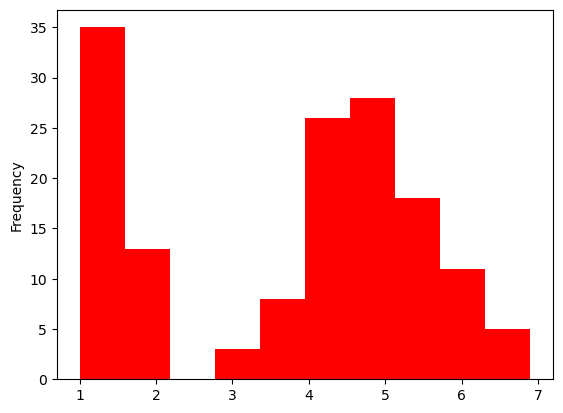

In [24]:
df['petal length'].plot(kind = 'hist',bins = 10,color = 'red')

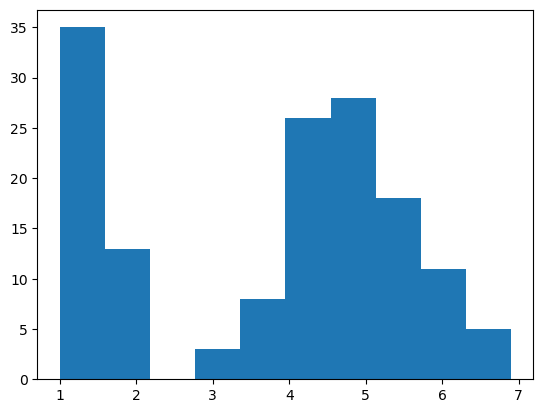

In [25]:
# another method
plt.hist(df['petal length'],bins = 10)
plt.show()

<AxesSubplot:ylabel='Frequency'>

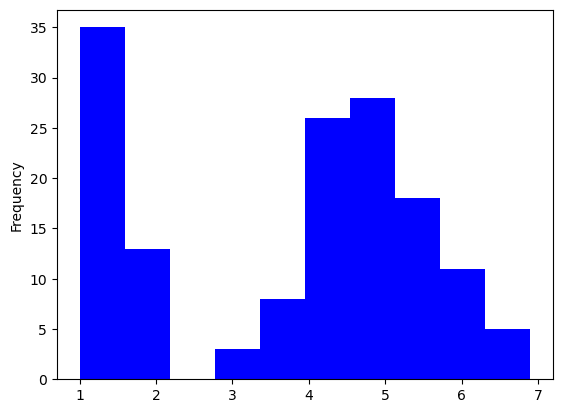

In [26]:
# another method
df['petal length'].plot.hist(color = 'blue')

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

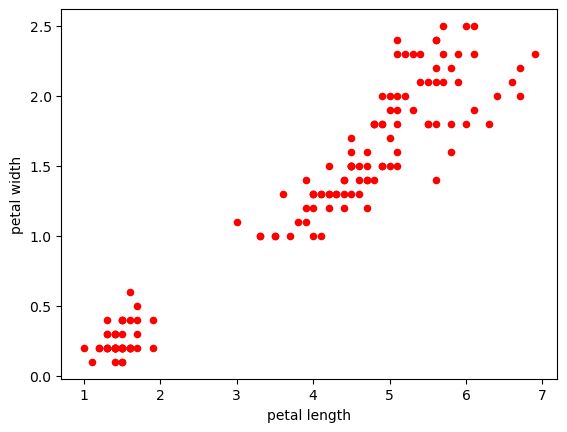

In [27]:
df.plot.scatter(x='petal length',y='petal width',c='red')

<AxesSubplot:xlabel='petal length'>

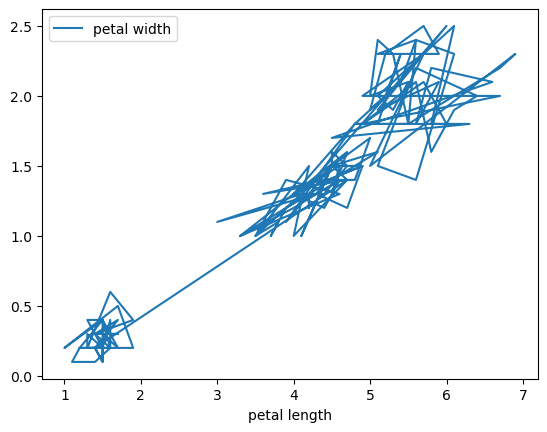

In [28]:
df.plot(x='petal length',y='petal width')

<AxesSubplot:>

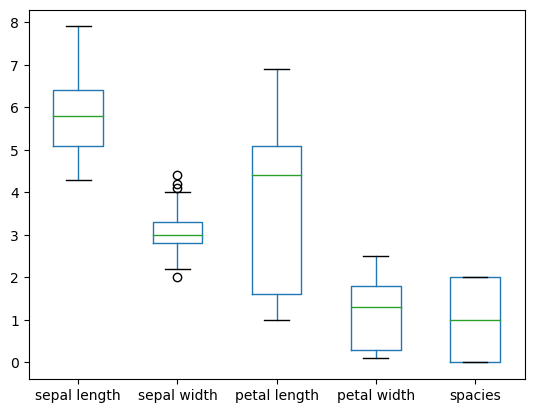

In [29]:
df.plot.box()